# The Empirical Rule and Distribution

In week 2, we discussed the empirical rule or the 68 - 95 - 99.7 rule, which describes how many observations fall within a certain distance from our mean.  This distance from the mean is denoted as sigma, or standard deviation (the average distance an observation is from the mean).

The following image may help refresh your memory:

![Three Sigma Rule](image\three_sigma_rule.png)

For this tutorial, we will be exploring the number of hours the average college student gets.

The example used in lecture stated there was a mean of 7 and standard deviation of 1.7 for hours of sleep; we will use these same values.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738)

In [2]:
mu = 7 # average college student within our population will have about 7 hours of sleep a night

sigma = 1.7 # average distance from this mean is about 1.7.

Observations = [random.normalvariate(mu, sigma) for _ in range(100000)]

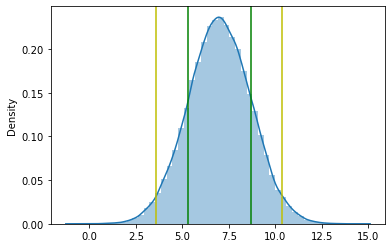

In [3]:
sns.distplot(Observations)

plt.axvline(np.mean(Observations) + np.std(Observations), color = "g")
plt.axvline(np.mean(Observations) - np.std(Observations), color = "g")

plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), color = "y")
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), color = "y")


We chave this nice bell curve. We have our mean looking about around 7.  So we can signify where we +1 or- 1 standard deviation and 2 standard deviations (vertical lines).

So basically what this is telling us is, in between the two green lines, we have 68% of our observations. In between the two yellow lines, we have 95%. And then the following lines, furthest to the end of the bell curve, we have about 99.7% of our observations.

Now next, I guess, what we'll do is we'll just kind of get a little more descriptive in terms of our observations and kind of do some summary statistics or some descriptive statistics here. And we'll from the pandas Library, we'll create a Series object because that will enable us to use our pandas function describe. 

In [4]:
pd.Series(Observations).describe()

count    100000.000000
mean          7.000626
std           1.693249
min          -0.754203
25%           5.865611
50%           7.003080
75%           8.144851
max          14.595650
dtype: float64

And what I'm going to do next is here we're going to draw some random samples from these observations. So let's do three, SampleA, SampleB, SampleC and pull 100 values from each of these.

In [5]:
SampleA = random.sample(Observations, 100)
SampleB = random.sample(Observations, 100)
SampleC = random.sample(Observations, 100)

Now I'm going to overlay these three samples and show how their distributions vary. And it won't be by much.

<AxesSubplot:ylabel='Density'>

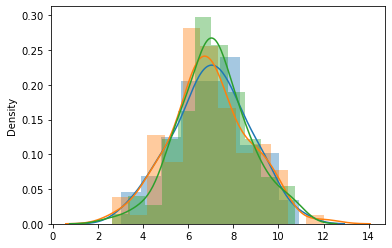

In [6]:
fig, ax = plt.subplots()

sns.distplot(SampleA, ax = ax)
sns.distplot(SampleB, ax = ax)
sns.distplot(SampleC, ax = ax)

And we can see that these distributions do vary. However, they follow the same similar trend where our mean is just about around 7 and our 68%, our 95%, and 99.7% rule still almost apply very significantly.
 
Now that we have covered the 68 - 95 - 99.7 rule, we will take this a step further and discuss the empirical distribution.

The empirical distribution is a cumulative density function that signifies the proportion of observations that are less than or equal to a certain values.

Lets use the initial image above as an example of this concept.

Now, by using our observations for ours of sleep, we can create an empirical distribution in python that signifies the proportion of observations are observed at a specific number for hours of sleep.

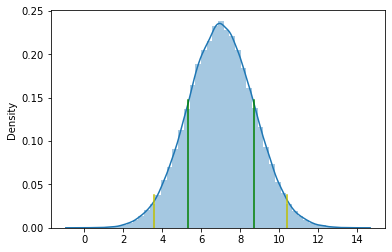

In [7]:
mu = 7

sigma = 1.7

Observations = [random.normalvariate(mu, sigma) for _ in range(100000)]

sns.distplot(Observations)
plt.axvline(np.mean(Observations) + np.std(Observations), 0, .59, color = 'g')
plt.axvline(np.mean(Observations) - np.std(Observations), 0, .59, color = 'g')

plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), 0, .15, color = 'y')
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), 0, .15, color = 'y')

Text(0, 0.5, 'Percentage of students')

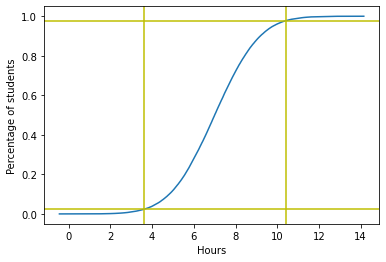

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(Observations)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) - (2 * np.std(Observations)), color = 'y', linestyle='-')

plt.axhline(y = 0.975, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) + (2 * np.std(Observations)), color = 'y', linestyle='-')

plt.xlabel("Hours")
plt.ylabel("Percentage of students")